# Pymaceuticals Inc.
---

### Analysis

- For this dataset, in order to really determine which drug regimen is the best/ most effective, more graphs would need to be generated, and also probably more studies would need to be done. That being said when looking at mice treated with Capomulin, Ramicane, Infubinol, and Ceftamin, the mice treated with Capomulin and Ramicane had lower ending tumor volumes than mice treated with Infubinol and Ceftamin. However, Capomulin and Ramicane also have the largest treatment groups (Mouse ID/Timepoints), which could mean that more mice were treated, or just more timepoints were taken. 

- When looking at mice treated with Capomulin, mice that weighed more, had larger tumors. This could just be that the mice that had larger tumors, would then weigh more, or it could be that larger mice can support a larger tumor. One would need the weight of the mouse pre tumor in order to try and figure out which one of these it is. 

- When looking at just one mouse (s185) that was treated with Capomulin, overall the tumor decreased over time, and was almost gone after timepoint 40. However it actually decreased around timepoint 10, and then went back up. It is unclear the reason as to why the tumor volume went down and then back up, if that is just some sort of user error when administering the drug to this mouse, or if this is a commonality for this particular drug treatment, or if this is common amongst all drug treatments. More graphs would need to be made to figure this out.

Next steps for analyzing this set of data would be to make more graphs, and possibly get more information if possible. 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_complete =pd.merge(mouse_metadata, study_results, how='left', on='Mouse ID')

# Display the data table for preview
mouse_data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
number_mice = mouse_data_complete['Mouse ID'].nunique()
print("Number of Mice:", number_mice)

Number of Mice: 249


In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_data_complete[mouse_data_complete.duplicated(subset=['Mouse ID','Timepoint'],keep=False)]
print("Duplicate Mice:")
print(duplicate_mice['Mouse ID'].unique())

Duplicate Mice:
['g989']


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = mouse_data_complete.loc[mouse_data_complete['Mouse ID']!='g989']
clean_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Checking the number of mice in the clean DataFrame.
new_number_mice = clean_mouse_df['Mouse ID'].nunique()
print("Number of Mice:", new_number_mice)

Number of Mice: 248


## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean_tumor_volume = clean_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_tumor_volume = clean_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance_tumor_volume = clean_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_tumor_volume = clean_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_tumor_volume = clean_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({
    'Mean Tumor Volume':mean_tumor_volume,
    'Median Tumor Volume':median_tumor_volume,
    'Tumor Volume Variance':variance_tumor_volume,
    'Tumor Volume Std. Dev.':std_tumor_volume,
    'Tumor Volume Std. Err.':sem_tumor_volume
})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_df_2 = clean_mouse_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean','median','var','std','sem']})
summary_df_2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: title={'center': 'Number of Samples Per Drug Regimen'}, xlabel='Drug Regimen', ylabel='Number of Samples (Mouse ID/Timepoints)'>

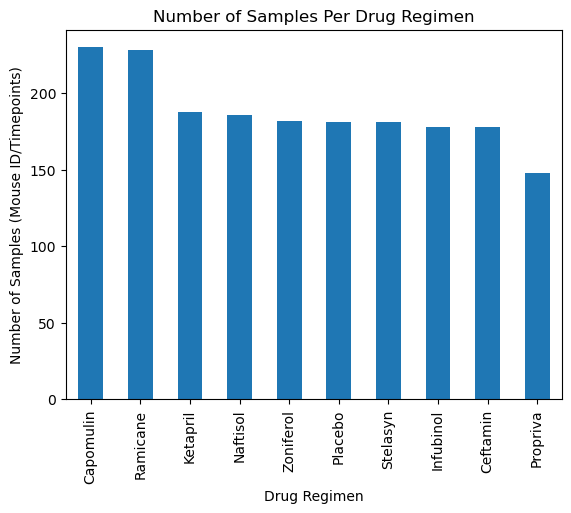

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
counts_per_regimen = clean_mouse_df['Drug Regimen'].value_counts()

counts_per_regimen.plot(kind='bar',xlabel='Drug Regimen',ylabel='Number of Samples (Mouse ID/Timepoints)',title='Number of Samples Per Drug Regimen')

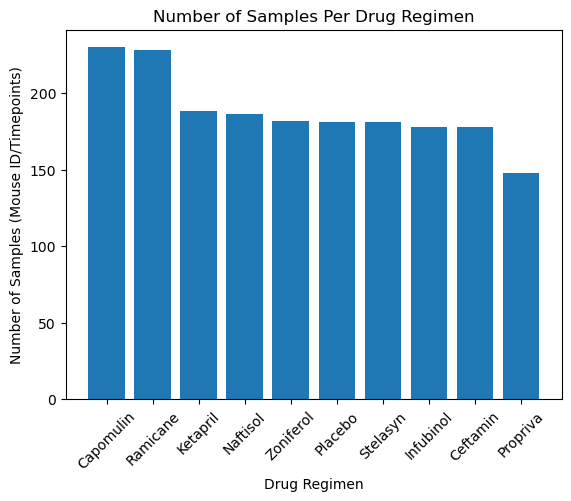

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

samples_per_regimen = clean_mouse_df['Drug Regimen'].value_counts()

py_values = samples_per_regimen.values
py_index = samples_per_regimen.index

plt.bar(py_index,py_values)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Samples (Mouse ID/Timepoints)')
plt.title('Number of Samples Per Drug Regimen')
plt.xticks(rotation=45)
plt.show()

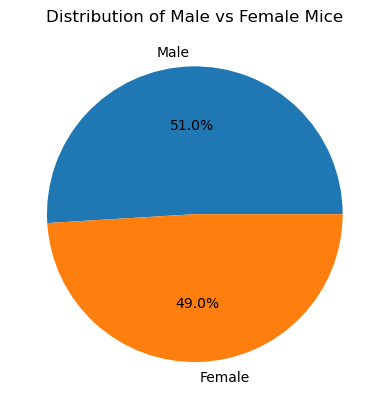

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_counts = clean_mouse_df['Sex'].value_counts()
gender_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Male vs Female Mice')
plt.ylabel('')
plt.show()

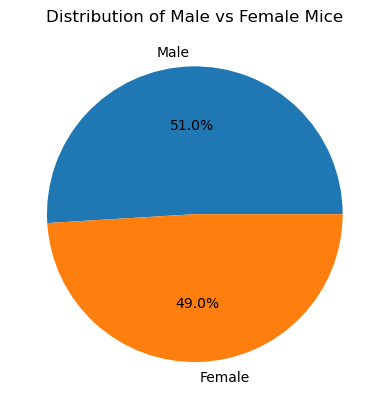

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_ratio=clean_mouse_df['Sex'].value_counts()

plt.pie(gender_ratio, labels=gender_ratio.index, autopct='%1.1f%%')
plt.title('Distribution of Male vs Female Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#list of the drugs
drug_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

#filter out the drug regimens from the main list
filtered_mouse_df = clean_mouse_df[clean_mouse_df['Drug Regimen'].isin(drug_regimens)]

#get the max time for each mouse that's in the right regimens
max_timepoint_df = filtered_mouse_df.groupby('Mouse ID')[['Timepoint']].max().reset_index()



# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_timepoint_df = pd.merge(max_timepoint_df,clean_mouse_df,how='left',on=['Mouse ID','Timepoint'])
merged_timepoint_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [23]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for d in drug_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumors = merged_timepoint_df.loc[merged_timepoint_df['Drug Regimen']==d]['Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_list.append(tumors)
    
    # Determine outliers using upper and lower bounds
    q1 = tumors.quantile(0.25)
    q3 = tumors.quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = tumors.loc[(tumors < fence_low) | (tumors > fence_high)]
    print(f"{d}'s potential outliers: {df_out}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


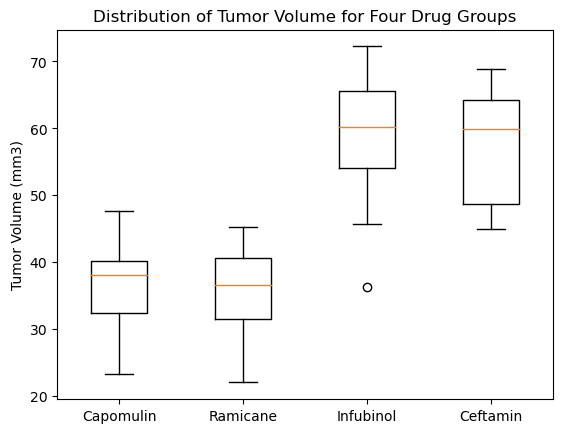

In [30]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_list,labels=drug_list)
plt.title('Distribution of Tumor Volume for Four Drug Groups')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

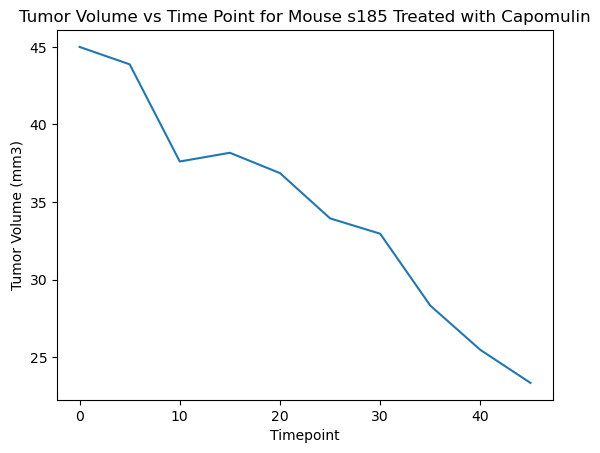

In [25]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mice = clean_mouse_df.loc[clean_mouse_df['Drug Regimen']=='Capomulin']
single_mouse =capomulin_mice.loc[capomulin_mice['Mouse ID']=='s185']

plt.plot(single_mouse['Timepoint'],single_mouse['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume vs Time Point for Mouse s185 Treated with Capomulin')
plt.show()

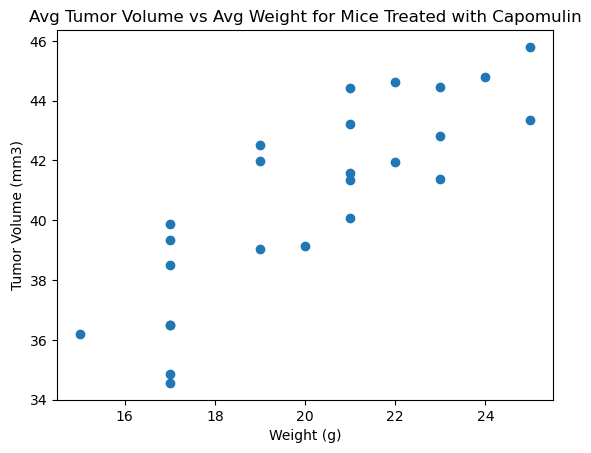

In [26]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_grouped = ['Weight (g)','Tumor Volume (mm3)']
avg_tumor_vol = capomulin_mice.groupby(['Mouse ID'])[capomulin_grouped].mean()
plt.scatter(avg_tumor_vol['Weight (g)'],avg_tumor_vol['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Avg Tumor Volume vs Avg Weight for Mice Treated with Capomulin')
plt.show()

## Correlation and Regression

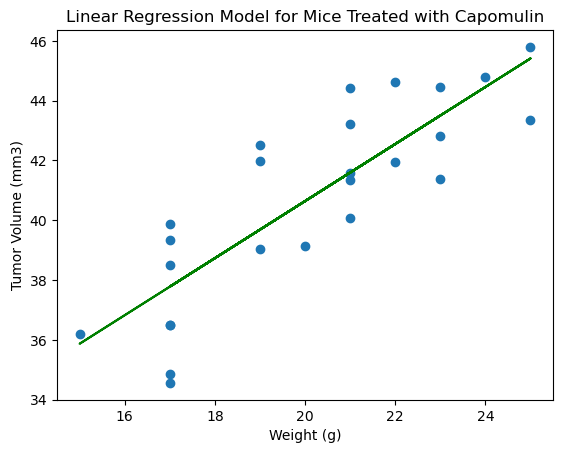

In [27]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_coefficient = st.pearsonr(avg_tumor_vol['Weight (g)'],avg_tumor_vol['Tumor Volume (mm3)'])[0]
linear_model = st.linregress(avg_tumor_vol['Weight (g)'],avg_tumor_vol['Tumor Volume (mm3)'])
y = avg_tumor_vol['Weight (g)']*linear_model[0]+linear_model[1]
plt.scatter(avg_tumor_vol['Weight (g)'],avg_tumor_vol['Tumor Volume (mm3)'])
plt.plot(avg_tumor_vol['Weight (g)'],y, color = 'green')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Linear Regression Model for Mice Treated with Capomulin')
plt.show()
